In [14]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
plt.rc('font', size=10)

In [15]:
df_data = pd.read_csv("../results/characterizing_dataset/described_dataset.csv")

palette_values2 =  ['#00B0BE', '#005D82', '#C17ADC','#98C127','#F45F74','#FFCD8E', '#FFB255']
colors2 = sns.color_palette(palette_values2)
colors_labels = sns.color_palette(['#00B0BE', '#005D82'])

In [16]:
columns_with_properties = ["Molecular weight", "Isoelectric Point", "Charge Density",
                           "Charge", "Instability Index", "Aromaticity",
                           "Aliphatic Index", "Hydrophobic Ratio"]

In [17]:
list_df = []
for column in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
    df_values = df_data[["Task", column]]
    df_values.columns = ["Task", "Percentage"]
    df_values["Residue"] = column
    list_df.append(df_values)

df_process = pd.concat(list_df, axis=0)

In [18]:
df_acc = df_process[(df_process["Task"] == "Negative data") | (df_process["Task"] == "Positive data")]
df_ss = pd.read_csv("../results/characterizing_dataset/percentage_ss.csv")
df_ss = df_ss[df_ss["column"].str.contains("ss8", na=False)]
mapping = {"E": "β-strand", "L": "Loop", "H": "α-helix", 
           "S": "Coil", "T": "Beta-turn", "G": "3-10 helix"}

df_ss["structure_type"] = df_ss["structure_type"].replace(mapping)

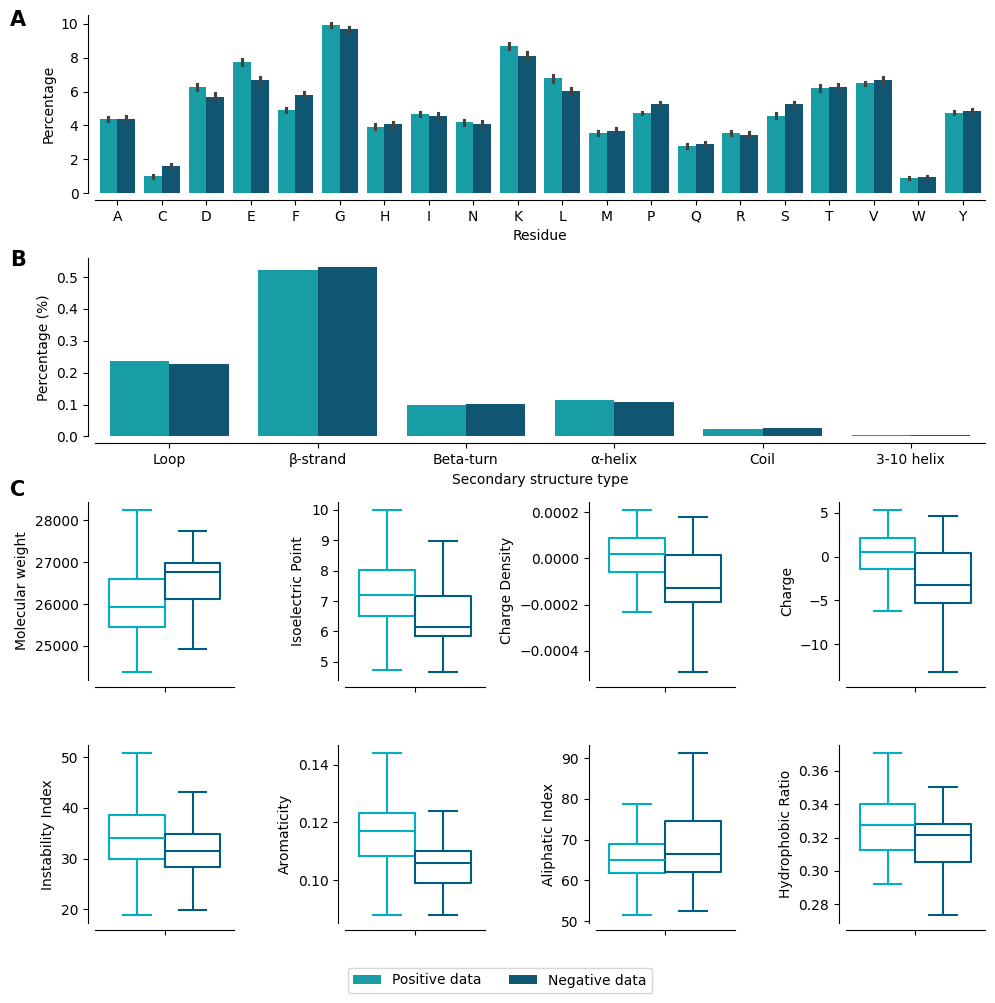

In [19]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 4, figure=fig)

fig.text(0.01, 0.99, "A", ha='left', va='top', fontsize=15, fontweight='bold')
fig.text(0.01, 0.75, "B", ha='left', va='top', fontsize=15, fontweight='bold')
fig.text(0.01, 0.52, "C", ha='left', va='top', fontsize=15, fontweight='bold')

# Gráfico A: ACC
ax_data1 = fig.add_subplot(gs[0, :4])
sns.barplot(
    ax=ax_data1,
    data=df_acc,
    x="Residue",
    y="Percentage",
    hue="Task",
    hue_order=["Positive data", "Negative data"],
    orient="v",
    palette=colors_labels,
    fill=True
)
ax_data1.get_legend().remove()

# Gráfico B: estructura secundaria
ax_proportion = fig.add_subplot(gs[1, :4])
sns.barplot(
    ax=ax_proportion,
    data=df_ss,
    x="structure_type",
    y="proportion",    
    hue="label",  
    palette=palette_values2,
    dodge=True,
    fill=True
    )
ax_proportion.set_xlabel("Secondary structure type")
ax_proportion.set_ylabel("Percentage (%)")
ax_proportion.set_xticklabels(df_ss["structure_type"].unique())  # Personaliza las etiquetas del eje X
ax_proportion.get_legend().remove()


# Gráficos C: Propiedades fisicoquimicas
for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 4)
    ax = fig.add_subplot(gs[2 + row, col_position])
    sns.boxplot(
        ax=ax,
        data=df_data,
        y=col,
        hue="Task",
        palette=colors2,
        showfliers=False,
        fill=False
    )
    ax.get_legend().remove()

sns.despine(offset=5)

# Leyenda
handles, labels = ax_data1.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0.0))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("../results/characterizing_dataset/description_dataset.png", dpi=300, bbox_inches='tight')